In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../data/titanic_train.csv',
                  index_col='PassengerId')

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Каждая строчка наборов данных содержит следующие поля:

Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

Name — имя;

Sex — пол;

Age — возраст;

SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

Parch — количество родителей, детей (в том числе приемных) на борту титаника;

Ticket — номер билета;

Fare — плата за проезд;

Cabin — каюта;

Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

В поле Age приводится количество полных лет. Для детей меньше 1 года — дробное. Если возраст не известен точно, то указано примерное значение в формате xx.5.

In [3]:
df = data.drop('Cabin', axis=1).dropna()

Постройте попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived.

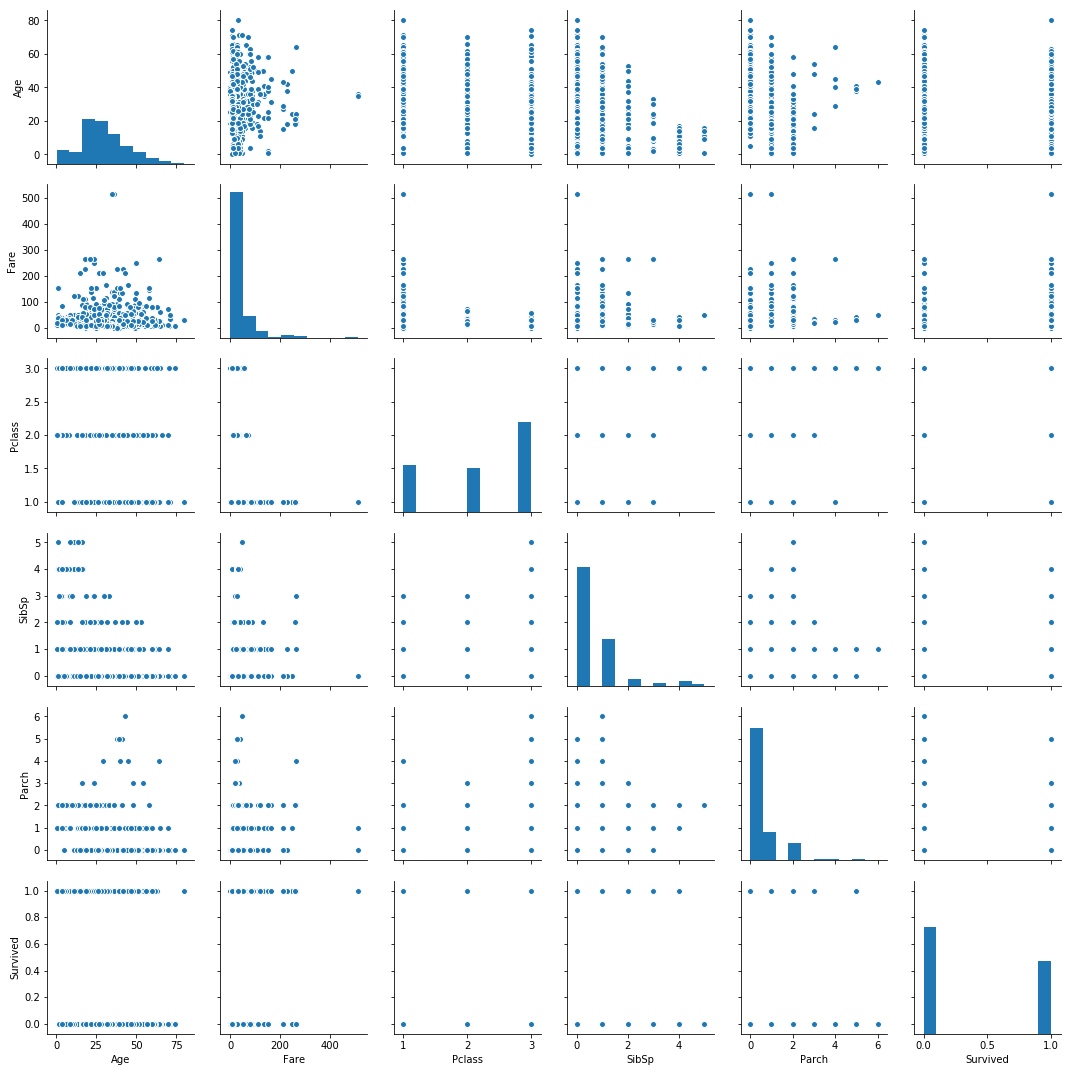

In [4]:
sns.pairplot(df[["Age", "Fare", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]])

Как плата за билет (Fare) зависит от класса каюты (Pclass)? Постройте boxplot.

In [6]:
df["Pclass"].unique()

array([3, 1, 2])

In [7]:
%config IPCompleter.greedy=True

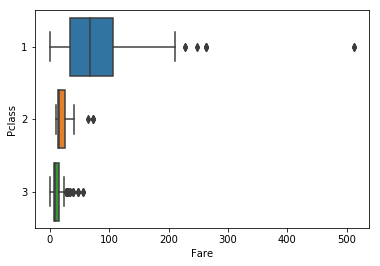

In [11]:
sns.boxplot(y = "Pclass", x = "Fare", data = df, orient="h")

Опционально: создайте признак Fare_no_out (стоимости без выбросов), в котором исключаются стоимости, отличающиеся от средней по классу более чем на 2 стандартных отклонения. Важно: надо исключать выбросы именно в зависимости от класса каюты. Иначе исключаться будут только самые большие (1 класс) и малые (3 класс) стоимости.

In [21]:
df[["Pclass", "Fare"]].groupby("Pclass").agg({"Fare": ["mean", "std", "min"]})

Fare                 
             mean        std   min
Pclass                            
1       88.048121  81.293524   0.0
2       21.471556  13.187429  10.5
3       13.229435  10.043158   0.0

In [24]:
def fare_no_out(row):
    if row["Pclass"] == 1 and row["Fare"] > (88 + 81*2):
        return -1
    elif row["Pclass"] == 2 and row["Fare"] > (21 + 13*2):
        return -1
    elif row["Pclass"] == 3 and row["Fare"] > (13 + 10*2):
        return -1
    else:
        return row["Fare"]
    

In [27]:
df.loc[:, "Fare_no_out"] = df.apply(lambda row: fare_no_out(row), axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_no_out
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,7.2500
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,71.2833
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,7.9250
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,53.1000
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,8.0500


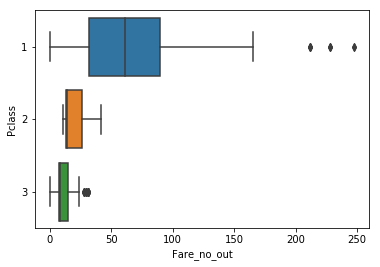

In [28]:
sns.boxplot(y = "Pclass", 
            x = "Fare_no_out", 
            data = df[df["Fare_no_out"] > -1], 
            orient="h")

Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.

/opt/Anaconda3-4.4.0/lib/python2.7/site-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


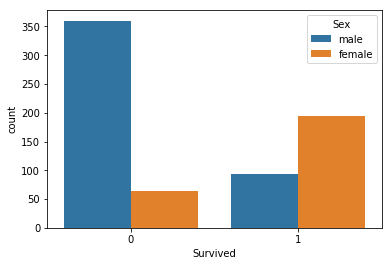

In [29]:
sns.countplot(x = "Survived", hue = "Sex", data = df)

Каково соотношение погибших и выживших в зависимости от класса каюты?

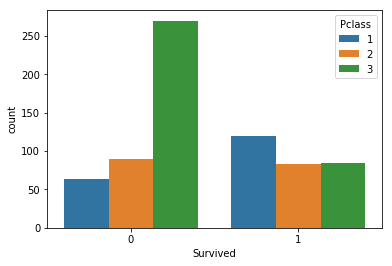

In [30]:
sns.countplot(x = "Survived", hue = "Pclass", data = df)

Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58a5b0ca10>]],
      dtype=object)

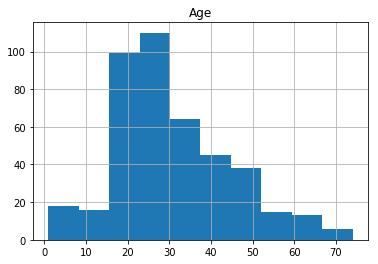

In [31]:
df[df["Survived"] == 0][["Age"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f58a5aa7450>]],
      dtype=object)

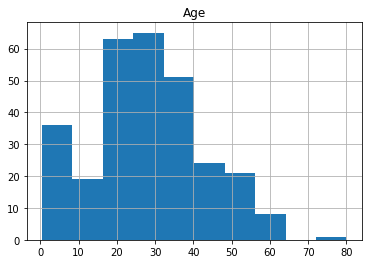

In [32]:
df[df["Survived"] == 1][["Age"]].hist()